# 1.4 Module.py

#### NIVEL: Intermedio

Hasta ahora has aprendido los conocimientos básicos de programación en Python y has profundizado un poco en la estructura en que se componen los entornos de Python, y como es que estos se relacionan para importar funciones desde modulos que no pertenecen al sistema base de Python.

En este ejercicio, pondrás en práctica esos conocimientos para crear tu propio modulo. 

Una observación importante es que Jupyter notebook no es el entorno adecuado para escribir un script. Así que tendrás que escribir tu modulo en Spyder. 

### Crea los archivos necesarios

Para que Python reconozca un script como módulo se necesita que el script este guardado en un directorio donde Python pueda encontrarlo. Por ahora bastará con que lo guardes en el directorio relativo a este notebook.

1. Crea un archivo en Spyder llamado "my_module.py"
2. Asegúrate que el archivo este guardado en el mismo directorio.
3. Ejecuta la siguiente celda

In [ ]:
# El nombre del módulo es el mismo que el nombre del archivo
import my_module

Si seguiste las intrucciones adecuadamente, no debió habber ningún error al momento de ejecutar la celda anterior. 

Ahora fijáte en el directorio donde tienes almacenados estos archivos. Nota que se ha creado una carpeta nueva llamada \_pycache\_. Dentro de ella debe haber un archivo llamado "my_module.interpreter-xy.pyc" donde interpreter esta sustituido por el intérprete que estés utilizndo para trabajar Python (muy probablmente "cpython") y xy corresponde con la versión de Python que estás utilizando.

En mi caso el archivo aparece como "my_module.cpython-37.pyc"

### Haz que tu modulo sea funcional

A pesar de que logramos importar exitósamente el modulo, en realidad este no hace nada porque el script esta vacío. 

4. Edita el archivo "my_module.py" para que incluya la línea: `print("I like to be a module")`
5. Guarda los cambios realizados. (No ejecutes el script)
6. Abre un nuevo script, importa tu modulo y observa la consola.

Al modificar modulos debes tener muy encuenta lo siguiente: Guardar los cambios en el script no siempre es suficiente para que el modulo se actualice, es necesario que ejecutes el script.  

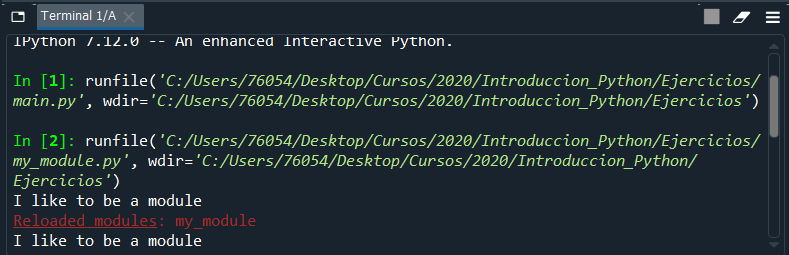

En rojo te indica que el modulo my_module debe volverse a ejecutar para que se actualicen los cambios realizados. Algunas funciones podrían verse comprometidas dependiendo de como haya estado creada la versión anterior. 

7. Ejecuta el modulo, y después el script de prueba.

Con el simple hecho de importarlo, la consola desplegará el mensaje que introducimos en el modulo. Cuando importamos un modulo Python ejecuta implícitamente su contenido, incluyendo las asignaciones de vriables, definiciones de objetos y funciones etc...

8. Añade la siguiente línea al código de my_module y actualizalo. ¿Qué hace? : `print(__name__)`
9. Ejecuta de nuevo el script prueba. ¿Hay diferencias en la salida?

Aunque no definimos la variable "\_\_name\_\_" Python la crea automáticamente al ejecutar un script. Nota que al utilizar esa variabe en un script automática recibe el nombre "\_\_main\_\_" pero al importarla la cambió a "my_module". De esta manera Python asigna el nombre con el que podremos llamar a los objetos que se encuentran en my_module.

Esa asignación es independiente para cada archivo. Puedes probar añadiendo la línea `print(__name__)`en el scropt de prueba. y notarás que primero te devuelve el nombre del módulo y despues el nombre main.  Así podemos identificar en que contexto esta almacenado el objeto. 

10. Reemplaza las líneas de código en "my_module" por la siguiente:

In [ ]:
if __name__ == "__main__":
    print("I prefer to be a module")
else:
    print("I like to be a module")

Con la instrucción anterior podemos saber si la salida proviene del contexto global de Python o del de un modulo.

11. Ahora añade una variable contador al modulo. Más adelante la usaremos para saber cuantas veces se ha invocado una función de my_module.

Definir variables en el modulo es posible, estas variables estarán disponibles para ser usadas por el usuario una vez que importe el módulo, pero como cualquier variable (excepto por las tuplas) es una variable mutable. Es una convención que para indicar al usuario que no modifique una variable, le precedan uno o dos guiones bajos, como la variable "\_\_name\_\_" pero es solo una convención. No limita al usuario de hacerlo, así que no es del todo seguro. 

12. Susituye el contenido de tu modulo por el siguiente: ¿Qué notas? ¿Qué crees que pase?

In [ ]:
#!/usr/bin/env python3 

""" module.py - an example of Python module """

_counter = 0

def suml(list):
    global _counter
    _counter += 1
    sum = 0
    for el in list:
        sum += el
    return sum

def prodl(list):
    global _counter
    _counter += 1
    prod = 1
    for el in list:
        prod *= el
    return prod

# Esta parte del código sirve para probar que las funciones definidas funcionan como es debido, pero solo corre cuando el modulo es ejecutado como script.

if __name__ == "__main__":
    print("I prefer to be a module, but I can do some tests for you")
    l = [i+1 for i in range(5)]
    print(suml(l) == 15)
    print(prodl(l) == 120)

_**Nota:**_ Incluye esta línea `#!/usr/bin/env python3`, no hace nada en apariencia porque es un simple comentario, pero en algunas plataformas  le indica al sistema operativo como ejecutar el contenido del archivo. Algunos entornos, especialmente los basados en web como jupyter, pueden tener problemas para importar modulos que no contengan dicha linea. 

Prueba la siguiente celda:

In [ ]:
import my_module
my_module._counter += 1
print(my_module._counter)

La variable counter fue pensada en ser un contador de cuantas veces se invoca una función de my_module, pero como puedes ver, puede ser modificada por el usuario. Prueba que puedas usar tus funciones:

In [ ]:
from my_module import suml, prodl

In [ ]:
# Crea una lista de 5 elementos 0
zeroes = [0 for i in range(5)]
ones = [1 for i in range(5)]
print(suml(zeroes), prodl(ones))

### Cambia la ubicación de tu modulo

Hasta ahora funciona todo bien. Prueba moviendo el archivo my_module.py a otro directorio y trata de ejecutar la celda siguiente.

In [5]:
# Para este ejemplo es necesario que reinicies el kernel
import my_module as mm

zeroes = [0 for i in range(5)]
ones = [1 for i in range(5)]
print(mm.suml(zeroes), mm.prodl(ones))

0 1


La razón del error es que esta vez Python no pudo encontrar el archivo my_module.python. 

Te preguntarás, ¿Entonces como es que python importa modulos estándar?.
La respuesta es la manera en la que Python busca los modulos. Existe una variable (que es una lista) donde se guardan los directorios en los que Python busca a los modulos. 

Python busca estos directorios en el orden en que aparecen en dicha variable y si no lo encuentra en ninguno, entonces devuelve el error. De otro modoel primer directorio donde encuentre el modulo detendrá la búsqueda y se usará ese modulo. 

La variable en cuestión es `path`y solo es accesible utilizando el modulo `sys`.

In [2]:
from sys import path
print(path)

['C:\\Users\\76054\\Desktop\\Cursos\\2020\\Introduccion_Python\\Ejercicios', 'C:\\Program Files (x86)\\PerkinElmerInformatics\\ChemOffice2016\\ChemScript\\Lib', 'C:\\Users\\76054\\anaconda3\\python37.zip', 'C:\\Users\\76054\\anaconda3\\DLLs', 'C:\\Users\\76054\\anaconda3\\lib', 'C:\\Users\\76054\\anaconda3', '', 'C:\\Users\\76054\\anaconda3\\lib\\site-packages', 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\76054\\.ipython']


Nota que el primer folder en el que Python busca es el directorio relativo al archivo en el que estamos trabajando. 

Para encontrar tu modulo podrías guardarlo en cualquier directorio incluido en `path`o bien, añadir uno nuevo. 

Si vas a hacer la primer opción , el directorio más recomendado es : `'C:\Users\76054\anaconda3\lib\site-packages'`. Que en la estrucutra de contextos de Python, es el directorio que fue pensado para almacenar modulos externos

De cualquier modo, es aún más recomendable crear un nuevo directorio donde almacenes exclusivamente los modulos que tu crees.

13. Accede al directorio anterior y crea una carpeta llamada "my_modules"
14. Mueve el archivo my_module.py a ese directorio
15. Añade el directorio a la variable `path`
16. Verifica que la variable path contenga al directorio
17. Vuelve a ejecutar la celda anterior. 

In [3]:
path.append('C:\\Users\\76054\\anaconda3\\lib\\site-packages\\my_modules')

In [4]:
path

['C:\\Users\\76054\\Desktop\\Cursos\\2020\\Introduccion_Python\\Ejercicios',
 'C:\\Program Files (x86)\\PerkinElmerInformatics\\ChemOffice2016\\ChemScript\\Lib',
 'C:\\Users\\76054\\anaconda3\\python37.zip',
 'C:\\Users\\76054\\anaconda3\\DLLs',
 'C:\\Users\\76054\\anaconda3\\lib',
 'C:\\Users\\76054\\anaconda3',
 '',
 'C:\\Users\\76054\\anaconda3\\lib\\site-packages',
 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\76054\\.ipython',
 'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\my_modules']

## Crea tu paquete

Del repositorio de ejercicios, en la carpeta "extra" se encuentran los archivos necesarios para este ejercicio: 

1. Crea el archivo \_\_init\_\_.py (vacío) en la carpeta raíz.
2. Crea el directorio ""..\site-packages\my_packages"
3. Copia el paquete a ese directorio
4. Añade el directorio a la variable `path`
5. Importalo

In [6]:
path.append('C:\\Users\\76054\\anaconda3\\lib\\site-packages\\my_packages')

In [13]:
path[-1]

'C:\\Users\\76054\\anaconda3\\lib\\site-packages\\my_packages'

In [23]:
import extra.iota

In [24]:
dir(extra.iota)

['FunI',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [27]:
print( extra.iota.FunI() )

Iota


In [29]:
import extra.good.best.sigma as sigma
from extra.good.best.tau import FunT 

In [32]:
print(sigma.FunS(), FunT())

Sigma Tau


Una de las ventajas de Python, es que puede extraer paqutes y modulos de archivos comprimidos `.zip`.
6. Comprime el archivo "extra" en un archivo llamado "extrapack.zip"
7. Muevelo al directorio "my_packages"
8. Importa un modulo de él

In [34]:
import extra2.good.best.sigma as sigma
print(sigma.FunS())

ModuleNotFoundError: No module named 'extra2'